In [1]:
import market as mkt
from datetime import datetime, timedelta
sim = mkt.Simulator(file_path="data/688001.SH/20220812/逐笔委托.csv")

In [2]:
sim.reset()
time = datetime(year=2022, month=8, day=12)+ timedelta(hours=9, minutes=15, seconds=0)
end_time = datetime(year=2022, month=8, day=12)+ timedelta(hours=15, minutes=00, seconds=0)
while time < end_time:
    time = sim.next_step()
print(sim.order_book)

2022-08-12 15:00:00
    bid_v  bid_p  ask_p  ask_v
0    3334  36.36  35.38    949
1   10946  36.35  36.00   2515
2    2611  36.34  36.08   2000
3    6170  36.33  36.10   6571
4    2035  36.32  36.15   2000
5    5981  36.31  36.17    212
6   22970  36.30  36.40    515
7    2180  36.29  36.48   3171
8     169  36.27  36.49   5900
9    1937  36.26  36.50   7200
10   6526  36.25  36.56    300


In [3]:
price_series = sim.order_book.historical_deal.set_index('time').resample('3s').last().dropna()
price_series

,price,vol,bid_uid,ask_uid
time,,,,
2022-08-12 09:25:00,37.45,400.0,35330.0,144365.0
2022-08-12 09:30:00,37.40,200.0,137141.0,172886.0
2022-08-12 09:30:03,37.38,340.0,193872.0,186466.0
2022-08-12 09:30:06,37.38,45.0,193872.0,211135.0
2022-08-12 09:30:30,37.20,261.0,271763.0,272397.0
...,...,...,...,...
2022-08-12 14:55:21,36.36,200.0,3249142.0,5021584.0
2022-08-12 14:55:42,36.36,110.0,3249142.0,5031055.0
2022-08-12 14:56:00,36.36,131.0,3249142.0,5037996.0


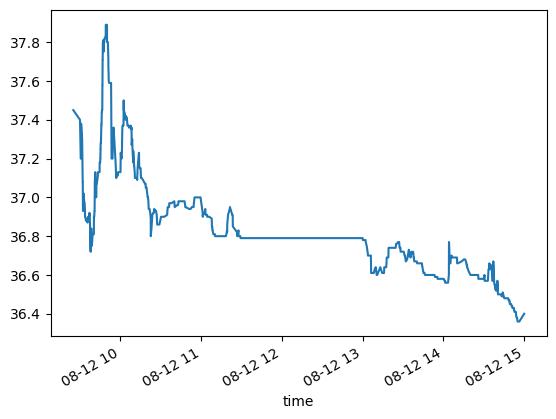

In [4]:
import matplotlib.pyplot as plt
price_series["price"].plot()
plt.show()

In [5]:
from portfolio import Portfolio
sim.reset()
port = Portfolio(cash=10e6, inventory=0)